In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import os
import PIL
import pathlib

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url,cache_dir='D:\Machine Learning\deep learning\image_classification',untar=True)

In [4]:
# Now data_dir points to the extracted directory
data_dir = pathlib.Path(data_dir).parent / 'flower_photos'

In [5]:
data_dir

WindowsPath('D:/Machine Learning/deep learning/image_classification/datasets/flower_photos')

In [6]:
img_count=len(list(data_dir.glob('*/*.jpg')))
img_count

3670

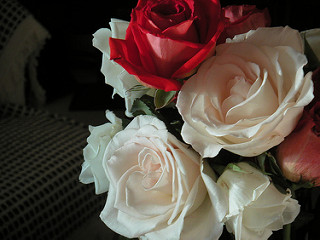

In [7]:
roses=list(data_dir.glob('roses/*'))
roses[:3]
PIL.Image.open(str(roses[1]))

In [8]:
flowers_images_dict={
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')), 
}

In [9]:
flowers_label_dict={
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers':3,
    'tulips':4,
}

In [10]:
flowers_images_dict['roses'][0]

WindowsPath('D:/Machine Learning/deep learning/image_classification/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [11]:
#image ko numbers mein convert kardega
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [12]:
# whenever training the model we have to make it of same size
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [13]:
x , y =[] , []

for f_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_label_dict[f_name])

In [14]:
x=np.array(x)
y=np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=0)

In [16]:
len(x_train)

2752

In [17]:
len(x_test)

918

In [18]:
x_train_scaled=x_train / 255
x_test_scaled=x_test / 255

In [20]:
num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 50s 574ms/step - loss: 1.3690 - accuracy: 0.4248
Epoch 2/10
86/86 [==============================] - 52s 609ms/step - loss: 0.9848 - accuracy: 0.6152
Epoch 3/10
86/86 [==============================] - 49s 566ms/step - loss: 0.7890 - accuracy: 0.7028
Epoch 4/10
86/86 [==============================] - 44s 506ms/step - loss: 0.5858 - accuracy: 0.7852
Epoch 5/10
86/86 [==============================] - 43s 505ms/step - loss: 0.4237 - accuracy: 0.8470
Epoch 6/10
86/86 [==============================] - 47s 548ms/step - loss: 0.2443 - accuracy: 0.9208
Epoch 7/10
86/86 [==============================] - 54s 631ms/step - loss: 0.1122 - accuracy: 0.9695
Epoch 8/10
86/86 [==============================] - 76s 884ms/step - loss: 0.0593 - accuracy: 0.9858
Epoch 9/10
86/86 [==============================] - 83s 964ms/step - loss: 0.0377 - accuracy: 0.9906
Epoch 10/10
86/86 [==============================] - 58s 670ms/step - loss: 0.0465 - accura

In [22]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 3s 104ms/step - loss: 1.8030 - accuracy: 0.6481


[1.8029794692993164, 0.6481481194496155]

In [23]:
predictions=model.predict(x_test_scaled)
predictions

29/29 [==============================] - 3s 103ms/step


array([[  2.1233954 ,  12.861212  ,   3.597525  , -12.174294  ,
         -3.224176  ],
       [  4.459857  ,   0.45859945,  -9.865852  ,  -5.7978277 ,
          6.72197   ],
       [  2.322733  ,   7.0455904 ,  12.124287  ,  -9.469739  ,
         -1.6799537 ],
       ...,
       [ -1.7179765 ,  -9.593428  ,   2.4676988 ,   0.68322474,
          9.552982  ],
       [  3.3940985 ,   1.6898769 ,   6.4794245 ,  -5.6400375 ,
         -4.5327783 ],
       [  6.050215  ,  -0.61856097,  -7.713222  , -10.157149  ,
         13.527831  ]], dtype=float32)

In [24]:
#converts the array in probabilty score
score=tf.nn.softmax(predictions[0]) 
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.1705771e-05, 9.9988341e-01, 9.4794072e-05, 1.3401911e-11,
       1.0331278e-07], dtype=float32)>

In [25]:
# shows value for maxiumum probability
np.argmax(score)

1

In [46]:
# now we can use data augumentation= Data augmentation is the process of artificially generating new data 
# from existing data, primarily to train new machine learning (ML) models and will reduce model overfitting.
data_augmentation0=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.5)
])
data_augmentation1=keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9)
])
data_augmentation2=keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.5)
])

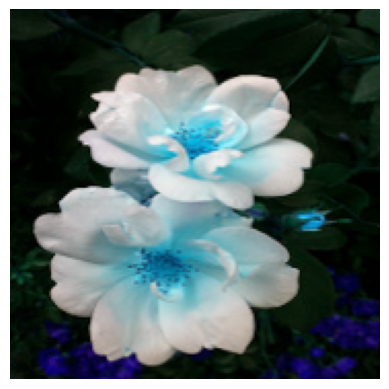

In [47]:
plt.axis('off')
plt.imshow(x[0])

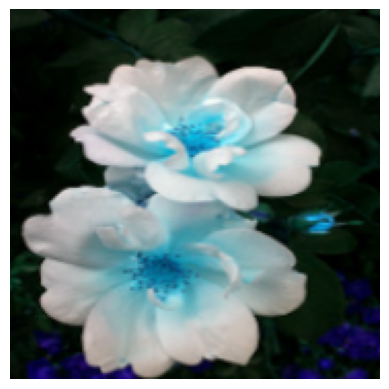

In [48]:
plt.axis('off')
plt.imshow(data_augmentation0(x)[0].numpy().astype("uint8"))

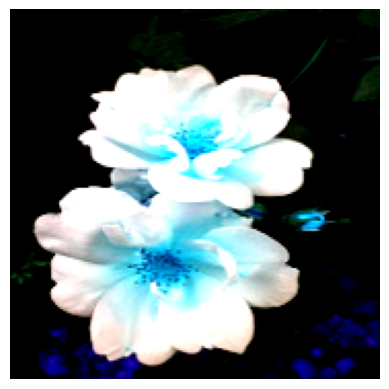

In [49]:
plt.axis('off')
plt.imshow(data_augmentation1(x)[0].numpy().astype("uint8"))

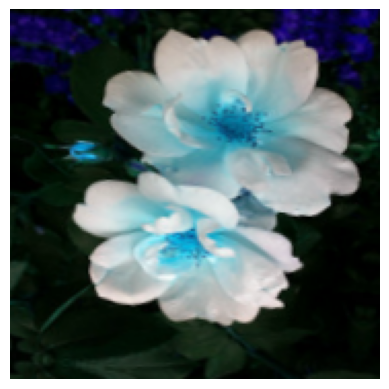

In [50]:
plt.axis('off')
plt.imshow(data_augmentation2(x)[0].numpy().astype("uint8"))

In [53]:
# now above images are the examples of how augmentation works now lets implement in our model

data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                  input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [54]:
num_classes=5
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model.fit(x_train_scaled,y_train,epochs=12)

Epoch 1/12
86/86 [==============================] - 54s 608ms/step - loss: 1.2614 - accuracy: 0.4753
Epoch 2/12
86/86 [==============================] - 54s 630ms/step - loss: 1.0329 - accuracy: 0.5847
Epoch 3/12
86/86 [==============================] - 60s 702ms/step - loss: 0.9242 - accuracy: 0.6468
Epoch 4/12
86/86 [==============================] - 57s 662ms/step - loss: 0.8589 - accuracy: 0.6690
Epoch 5/12
86/86 [==============================] - 60s 695ms/step - loss: 0.8104 - accuracy: 0.6864
Epoch 6/12
86/86 [==============================] - 62s 717ms/step - loss: 0.7687 - accuracy: 0.7071
Epoch 7/12
86/86 [==============================] - 78s 908ms/step - loss: 0.7256 - accuracy: 0.7177
Epoch 8/12
86/86 [==============================] - 56s 650ms/step - loss: 0.6969 - accuracy: 0.7344
Epoch 9/12
86/86 [==============================] - 51s 591ms/step - loss: 0.6500 - accuracy: 0.7424
Epoch 10/12
86/86 [==============================] - 51s 589ms/step - loss: 0.6196 - accura

In [55]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 3s 104ms/step - loss: 0.7776 - accuracy: 0.7266


[0.7775565981864929, 0.7265795469284058]